# Dataset electric vehicles

In this small project, we will look at electric vehicles and their manufacturers

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\KACPE\Downloads\archive (2)\Alternative Fuel Vehicles US.csv")

After loading the dataframe, I only search for electric cars

In [3]:
df = df[df.Fuel == "Electric"]

Using the code below, I can check the list of all electric car manufacturers

In [4]:
list_of_manufacturers = []


for i in df.Manufacturer:
    if i not in list_of_manufacturers:
        list_of_manufacturers.append(i)
print(list_of_manufacturers)

['Audi', 'BMW', 'Chevrolet', 'Ford', 'Hyundai', 'Kia', 'Lucid USA, Inc.', 'Mazda', 'Mercedes-Benz', 'Mini', 'Nissan', 'Polestar Automotive USA', 'Porsche', 'Rivian ', 'Tesla', 'Volkswagen', 'Volvo', 'Jaguar', 'Kandi', 'Autocar', 'Battle Motors', 'Blue Bird', 'BYD', 'COBUS Industries', 'Collins Bus Corp.', 'ENC', 'Freightliner Custom Chassis', 'FUSO', 'Gillig', 'Global', 'GM BrightDrop', 'GreenPower Motor Company', 'Hometown Manufacturing', 'IC Bus', 'International', 'Kalmar', 'Kenworth', 'Lion Electric', 'Mack', 'MCI', 'Morgan-Olson', 'New Flyer', 'Nova Bus', 'Optimal-EV', 'Orange EV', 'Peterbilt', 'Proterra', 'Starcraft', 'Thomas Built', 'Turtle Top', 'Utilimaster', 'Van Hool', 'Workhorse']


Let's go a step further. Now I will count how many electric cars have been produced by the given companies

In [5]:
list_of_manufacturers = {"Audi":2}


for i in df.Manufacturer:
    if i in list_of_manufacturers:
        list_of_manufacturers[i] += 1
    if i not in list_of_manufacturers:
        list_of_manufacturers[i] = 1


After creating the dictionary, I need to convert it into a dataframe and transpose it. I used the manufacturer's name as an index and gave the name to the column displaying the number of models. 
Finally, I sorted it in order from largest amount to smallest.

In [6]:
frame4 = pd.json_normalize(list_of_manufacturers)
frame4 = np.transpose(frame4)
frame4.columns =["Number of electric vehicles"]
frame4.sort_values("Number of electric vehicles", axis=0, ascending=False, inplace=True)
frame4.head(10)

,Number of electric vehicles
Ford,36
Tesla,24
BYD,17
Porsche,16
Audi,14
GreenPower Motor Company,10
BMW,9
Volkswagen,9
Lion Electric,8
Hometown Manufacturing,6


Now, I remove unnecessary columns, NaN values, and remove the engine types from the last column so that only the engine size remains

In [7]:
df = df.drop(["Category",'Model',"Model Year","PHEV Total Range"], axis=1)
df.reset_index(drop=True,inplace=True)

In [8]:
df = df.drop(df.iloc[:,6:12],axis = 1)
df.reset_index(drop=True,inplace=True)


In [9]:
df = df.drop(df.iloc[:,7:12],axis = 1)
df.reset_index(drop=True,inplace=True)
df.head()

,Manufacturer,Fuel,All-Electric Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Engine Size
0,Audi,Electric,238.0,81.0,83.0,82.0,175 kW electric motor
1,Audi,Electric,222.0,78.0,77.0,78.0,141 kW and 172 kW electric motor
2,Audi,Electric,208.0,72.0,75.0,73.0,138kW electric motor
3,Audi,Electric,181.0,62.0,64.0,63.0,138kW electric motor
4,Audi,Electric,218.0,76.0,78.0,77.0,141 kW and 172 kW electric motor


In [10]:
df["Engine Size"] = df["Engine Size"].str.strip("electric motor")
df["Engine Size"] = df["Engine Size"].str.strip("electric motors")

df = df[df['Engine Size'].notna()]

In [11]:
df.head(110)

,Manufacturer,Fuel,All-Electric Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Engine Size
0,Audi,Electric,238.0,81.0,83.0,82.0,175 kW
1,Audi,Electric,222.0,78.0,77.0,78.0,141 kW and 172 kW
2,Audi,Electric,208.0,72.0,75.0,73.0,138kW
3,Audi,Electric,181.0,62.0,64.0,63.0,138kW
4,Audi,Electric,218.0,76.0,78.0,77.0,141 kW and 172 kW
...,...,...,...,...,...,...,...
107,Porsche,Electric,227.0,75.0,81.0,77.0,210 and 250 kW
108,Porsche,Electric,200.0,76.0,84.0,79.0,240 kW
109,Porsche,Electric,225.0,71.0,80.0,75.0,280 kW
112,Tesla,Electric,353.0,141.0,127.0,134.0,131 and 190 kW


In [12]:
df.sort_values(by=["All-Electric Range"],inplace=True,ascending=False)
df.reset_index(drop=True,inplace=True)
df.head()

,Manufacturer,Fuel,All-Electric Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Engine Size
0,"Lucid USA, Inc.",Electric,520.0,126.0,125.0,125.0,198kW and 498kW
1,"Lucid USA, Inc.",Electric,516.0,130.0,132.0,131.0,178kW and 433kW
2,"Lucid USA, Inc.",Electric,481.0,115.0,117.0,116.0,198kW and 498kW
3,"Lucid USA, Inc.",Electric,471.0,117.0,114.0,116.0,370kW and 459kW
4,"Lucid USA, Inc.",Electric,469.0,121.0,122.0,121.0,178kW and 433kW


The following code changes the type of the value in a column "All-Electric Range"

In [13]:
df["All-Electric Range"] = df["All-Electric Range"].astype('int64') 

Finally, I show the car range as a graph

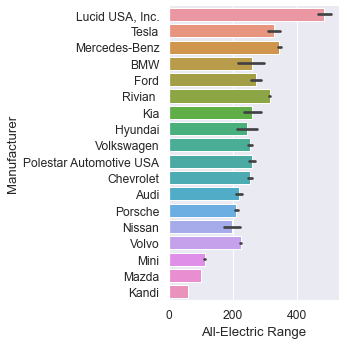

In [14]:
sns.set(font_scale = 1.1)
chart = sns.catplot(data=df, x = "All-Electric Range", y = "Manufacturer", kind = "bar",)